<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> UNEMPLOYMENT ANALYSIS WITH PYTHON
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> importing libraries </div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> Data Exploration </div>

In [6]:
df.shape

(267, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),267.0,1.223693e+01,1.080328e+01,0.5000,4.845000e+00,9.650000e+00,1.675500e+01,7.585000e+01
Estimated Employed,267.0,1.396211e+07,1.336632e+07,117542.0000,2.838930e+06,9.732417e+06,2.187869e+07,5.943376e+07
Estimated Labour Participation Rate (%),267.0,4.168157e+01,7.845419e+00,16.7700,3.726500e+01,4.039000e+01,4.405500e+01,6.969000e+01
longitude,267.0,2.282605e+01,6.270731e+00,10.8505,1.811240e+01,2.361020e+01,2.727840e+01,3.377820e+01
latitude,267.0,8.053242e+01,5.831738e+00,71.1924,7.608560e+01,7.901930e+01,8.527990e+01,9.293760e+01


In [9]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [10]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

Renaming the attributes

Region = state

Date = date

Frequency = frequency

Estimated Unemployment Rate (%) = estimated unemployment rate

Estimated Employed = estimated employment

Estimated Labour Participation Rate (%) = estimated labour participation rate

Region.1 = region

longitude = longitude

latitude = latitude

In [11]:
df.columns = ['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','region','longitude','latitude']
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [12]:
df.state.value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: state, dtype: int64

In [13]:
df.region.value_counts()

North        79
South        60
West         50
East         40
Northeast    38
Name: region, dtype: int64

In [14]:
df['date'] = pd.to_datetime(df['date'],dayfirst = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   state                                267 non-null    object        
 1   date                                 267 non-null    datetime64[ns]
 2   frequency                            267 non-null    object        
 3   estimated unemployment rate          267 non-null    float64       
 4   estimated employed                   267 non-null    int64         
 5   estimated labour participation rate  267 non-null    float64       
 6   region                               267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 18.9+ KB


Extracting month from date attribute

In [15]:
df['month_int'] = df['date'].dt.month
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5


The months are in integer datetype. We need to convert the months into words for better analysis,

In [16]:
df['month'] = df['month_int'].apply(lambda x: calendar.month_abbr[x])
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> EDA </div>

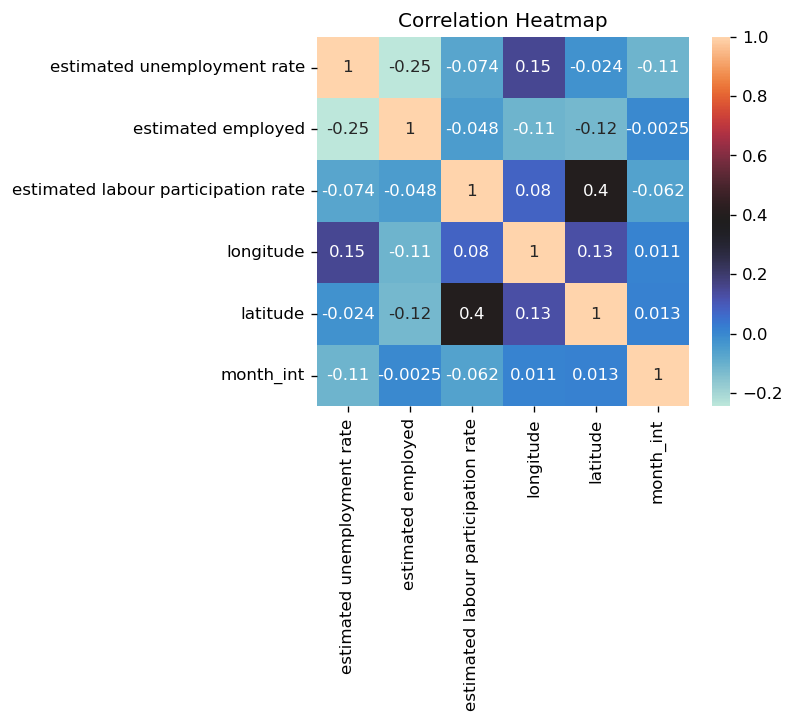

In [17]:
plt.figure(dpi = 120,figsize= (5,4))
sns.heatmap(df.corr(),annot=True,cmap='icefire')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
#Unemployment rate by state

count_by_region=df['region'].value_counts().rename_axis('State').reset_index(name='Count')
count_by_region.style.background_gradient(cmap='Blues')

,State,Count
0,North,79
1,South,60
2,West,50
3,East,40
4,Northeast,38


Numeric data grouped by months

In [26]:
data = df.groupby(['month'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
data=pd.DataFrame(data).reset_index()

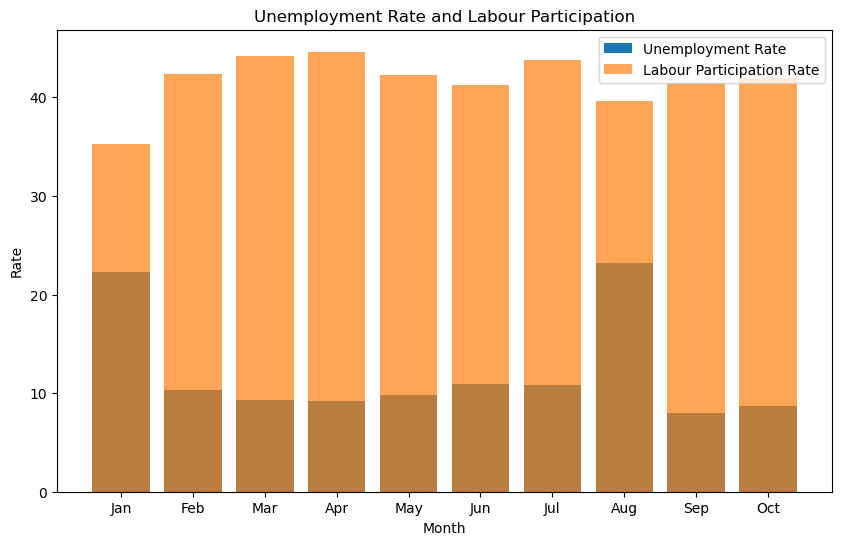

In [27]:
import matplotlib.pyplot as plt

# Bar plot of unemployment rate and labour participation rate
plt.figure(figsize=(10, 6))

plt.bar(data['month'], data['estimated unemployment rate'], label='Unemployment Rate')
plt.bar(data['month'], data['estimated labour participation rate'], label='Labour Participation Rate', alpha=0.7)

plt.title('Unemployment Rate and Labour Participation')
plt.xlabel('Month')
plt.ylabel('Rate')
plt.legend()
plt.xticks(data['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

plt.show()


Bar plot of estimated employed citizen in every month

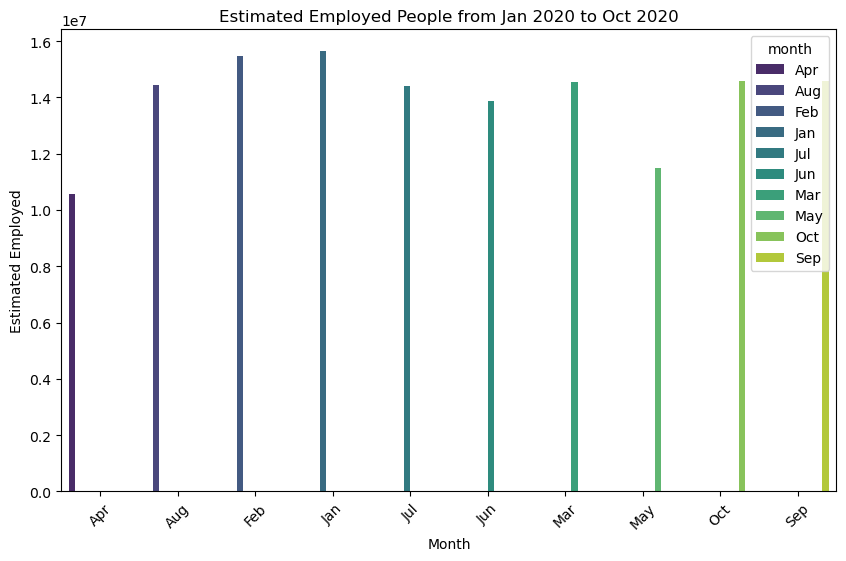

In [31]:
# Bar plot of estimated employed people
plt.figure(figsize=(10, 6))

sns.barplot(x='month', y='estimated employed', data=data, hue='month', palette='viridis')

plt.title('Estimated Employed People from Jan 2020 to Oct 2020')
plt.xlabel('Month')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=45)
plt.show()


### State wise Analysis

In [32]:
state =  df.groupby(['state'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
state = pd.DataFrame(state).reset_index()

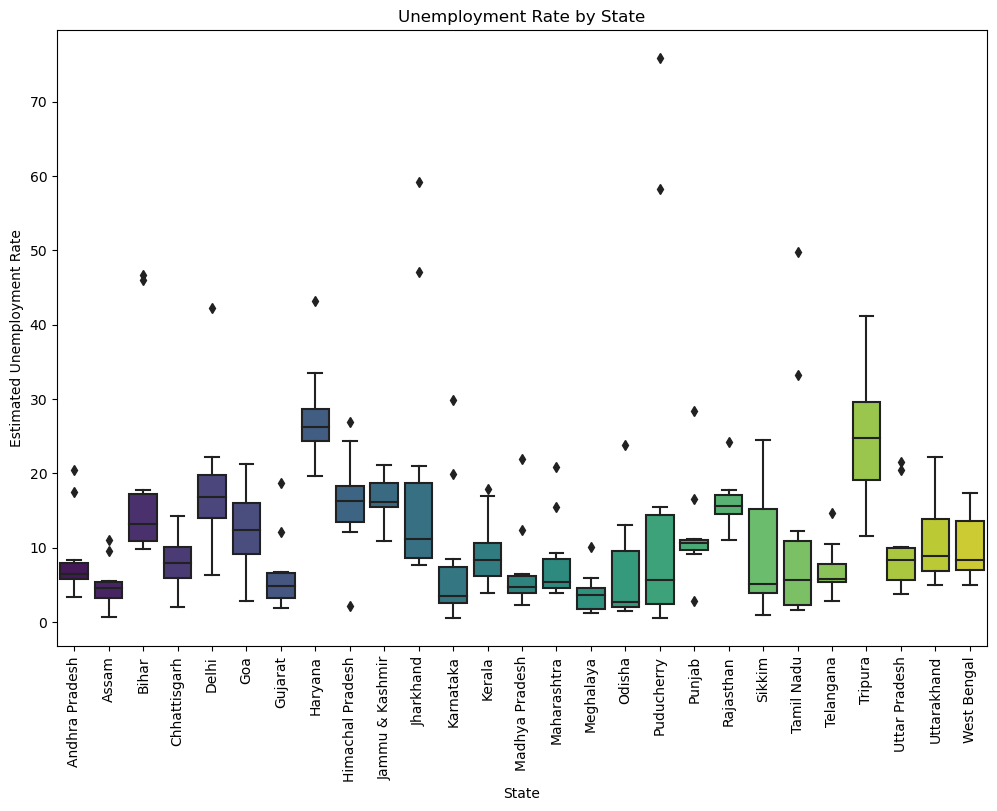

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of estimated unemployment rate
plt.figure(figsize=(12, 8))

# Assuming df is the original DataFrame
sns.boxplot(x='state', y='estimated unemployment rate', data=df, palette='viridis')

plt.title('Unemployment Rate by State')
plt.xlabel('State')
plt.ylabel('Estimated Unemployment Rate')

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


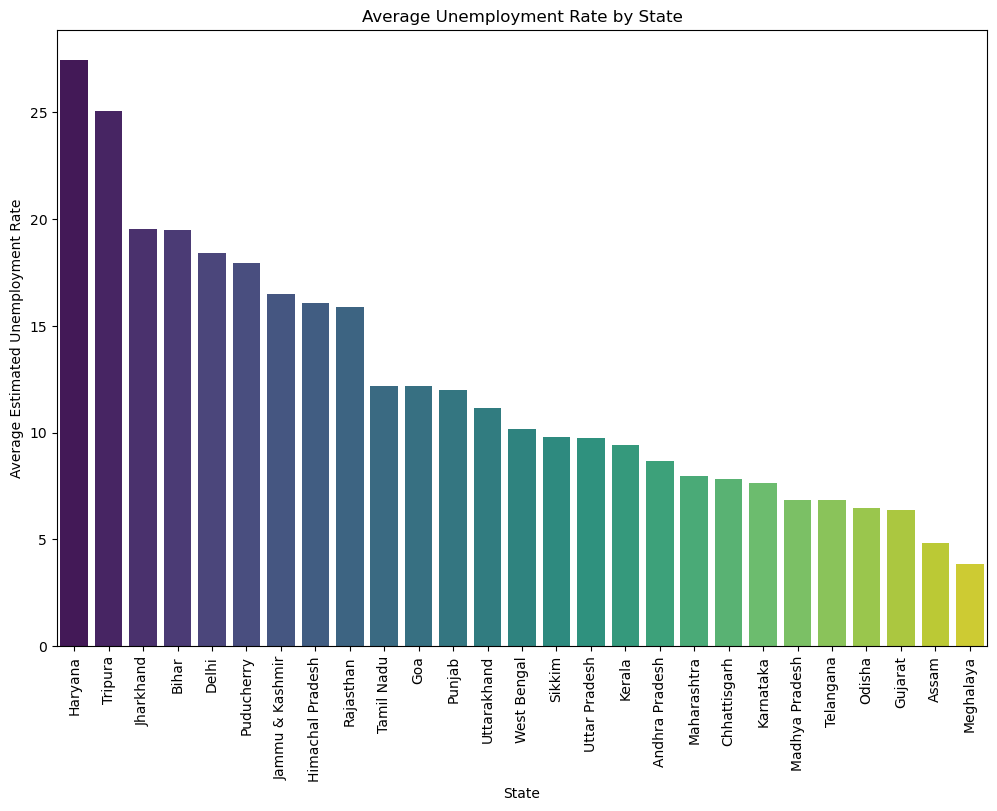

In [37]:
# Assuming state is the DataFrame with state-wise data
plt.figure(figsize=(12, 8))

# Sort the DataFrame by estimated unemployment rate in descending order
state_sorted = state.sort_values(by='estimated unemployment rate', ascending=False)

# Bar plot of average unemployment rate
sns.barplot(x='state', y='estimated unemployment rate', data=state_sorted, palette='viridis')

plt.title('Average Unemployment Rate by State')
plt.xlabel('State')
plt.ylabel('Average Estimated Unemployment Rate')

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


### Regional Analysis

In [47]:
# numeric data grouped by region

region = df.groupby(['region'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
region = pd.DataFrame(region).reset_index()

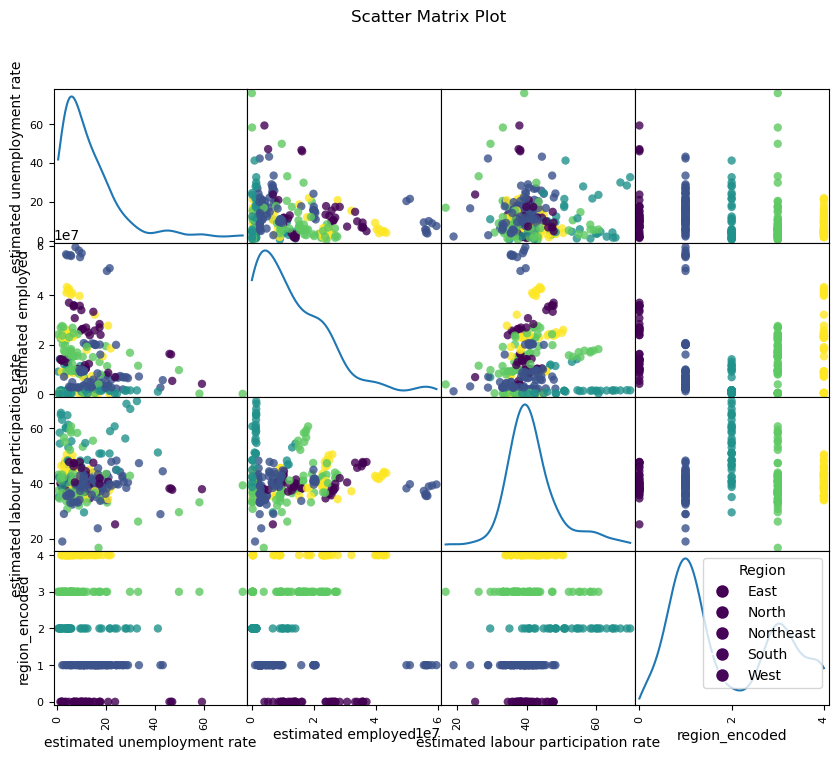

In [45]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
df_numeric = df[['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate']]

# Convert categorical 'region' column to numerical values
label_encoder = LabelEncoder()
df_numeric['region_encoded'] = label_encoder.fit_transform(df['region'])

# Scatter matrix plot
scatter_matrix(df_numeric, alpha=0.8, figsize=(10, 8), diagonal='kde', c=df_numeric['region_encoded'], marker='o')

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis.colors[i], markersize=10) for i in range(len(label_encoder.classes_))]
plt.legend(handles, label_encoder.classes_, title='Region', loc='upper right')

# Rotate x-axis and y-axis labels
plt.xticks(rotation=90)
plt.yticks(rotation=90)

plt.suptitle('Scatter Matrix Plot')
plt.show()


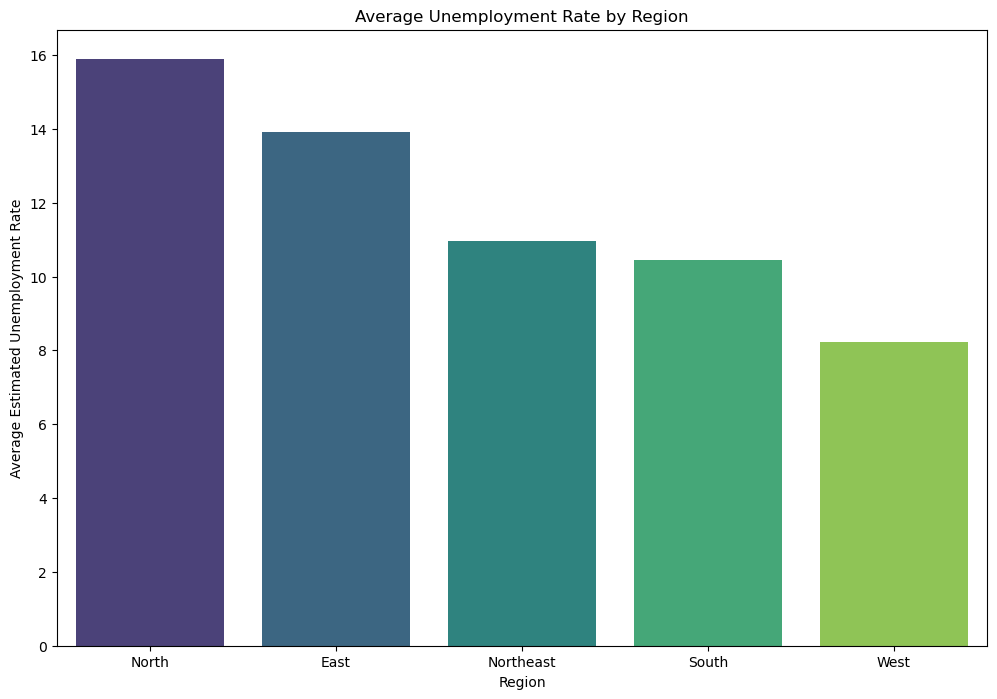

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming region is your DataFrame
plt.figure(figsize=(12, 8))

# Group by region and calculate the mean of estimated unemployment rate
average_unemployment_rate = region.groupby('region')['estimated unemployment rate'].mean().sort_values(ascending=False).reset_index()

# Bar plot of average unemployment rate
sns.barplot(x='region', y='estimated unemployment rate', data=average_unemployment_rate, palette='viridis')

plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Estimated Unemployment Rate')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.show()


In [61]:
!pip install squarify

### Unemployment rate before and after Lockdown

In [86]:
# data representation before and after lockdown

before_lockdown = df[(df['month_int']>=1) &(df['month_int'] <4)]
after_lockdown = df[(df['month_int'] >=4) & (df['month_int'] <=6)]

In [87]:
af_lockdown = after_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()

lockdown = before_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown['estimated unemployment rate']

lockdown.columns = ['state','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,state,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,5.700000,13.750000
1,Assam,4.613333,7.070000
2,Bihar,12.110000,36.806667
3,Chhattisgarh,8.523333,9.380000
4,Delhi,18.036667,25.713333
